# Plot the Annular mode indices in the Reanalysis


## Import modules


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import os

import calendar
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# %matplotlib inline

from read_AM_index_mod import Reanalysis

## Plot the AM index on a pressure level for a year

Calculating from the original data .......
Calculating from the original data .......


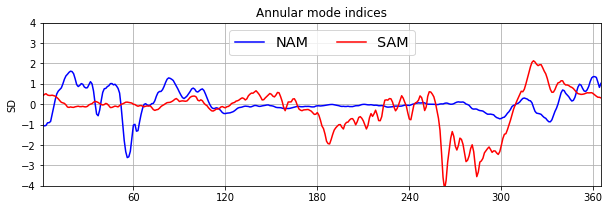

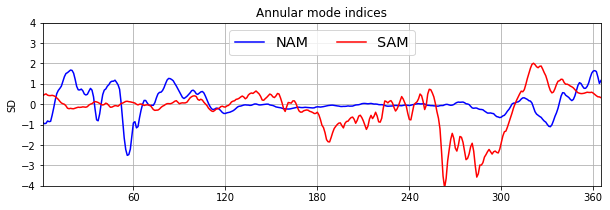

In [2]:
def plot_1year(data, year=2007, p_level=10, save_fig=False):
        time = np.linspace(1.0, 365, 365)
        yi = year - data.year_start  # python array starts from zero!
        ki = np.isin(data.level, p_level).nonzero()[0]
        ysize = 365

        fig = plt.figure(figsize=(10,3)) # size is optional
        ax1 = fig.add_subplot(1,1,1)
        ax1.plot(time, data.NAM[yi*ysize:(yi+1)*ysize, ki], 'b-', label='NAM')
        ax1.plot(time, data.SAM[yi*ysize:(yi+1)*ysize, ki], 'r-', label='SAM')
        legend = ax1.legend(loc='upper center', fontsize="x-large", ncol=3)
        ax1.set_xticks(np.linspace(60, 360, 6))
        ax1.set_ylabel('SD')
        ax1.set_title('Annular mode indices')
        ax1.axis([1, 365, -4, 4])
        #ax1.axhline(y=0, color='k', linestyle='--')
        ax1.grid()

        if save_fig:
            plt.savefig('Figs/AM_indices.png', transparent=True)

# test of removing harmoincs greater than `annual_cycle_fft` in D1
D0 = Reanalysis(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55', \
        annual_cycle_fft=0, running_mean=0, save_index=False)
D1 = Reanalysis(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55', \
        annual_cycle_fft=4, running_mean=0, save_index=False)
for D in [D0, D1]:
    D.load_data()

plot_1year(D0, year=2007, p_level=10, save_fig=False)
plot_1year(D1, year=2007, p_level=10, save_fig=False)

## Plot the AM index on three pressure levels for two years

Calculating from the original data .......


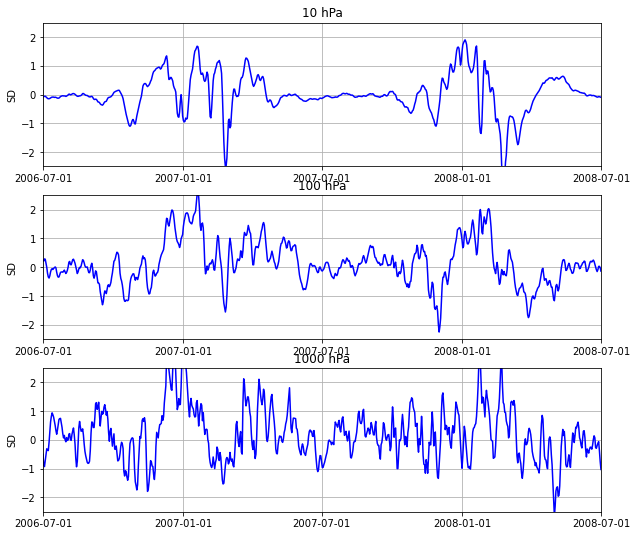

In [3]:
def plot_2year(data, year=2006, p_level=[10, 100, 1000], save_fig=False):
        
        d0 = pd.Timestamp(year, 1, 1)
        d_start = pd.Timestamp(year, 7, 1)
        d_end = pd.Timestamp(year+2, 7, 1)
        t = np.linspace(d_start.value, d_end.value, ((d_end-d_start).days+1))
        t = pd.to_datetime(t)
        time = mdates.date2num(t)

        yi = year-data.year_start  # python array starts from zero!
        kk = np.isin(data.level, p_level).nonzero()[0]

        fig = plt.figure(figsize=(10,9)) # size is optional
        for ii in range(1,4):
            ax1 = fig.add_subplot(3,1,ii)
            ax1.plot(time, data.NAM[(yi*365+(d_start-d0).days):(yi*365+(d_end-d0).days+1), kk[ii-1]], 'b-', label='NAM')
            #legend = ax1.legend(loc='upper center', fontsize="x-large", ncol=3)
            ax1.set_ylabel('SD')
            ax1.set_title(str(p_level[ii-1]) +' hPa')
            ax1.axis([time[0], time[-1], -2.5, 2.5])
            #ax1.axhline(y=0, color='k', linestyle='--')
            ax1.grid()
            ax1.set_xticks(mpl.dates.date2num([dt.date(year, 7, 1),
                                               dt.date(year+1, 1, 1), dt.date(year+1, 7, 1),
                                               dt.date(year+2, 1, 1), dt.date(year+2, 7, 1)
                                              ]))
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            #plt.gcf().autofmt_xdate()
            
        if save_fig:
            plt.savefig('Figs/AM_indices2.png', transparent=True)


D1 = Reanalysis(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55', \
        annual_cycle_fft=4, running_mean=0, save_index=False)
D1.load_data()

plot_2year(D1, year=2006, p_level=[10, 100, 1000], save_fig=False)

## Compare the AM index with fft_filtering, and running mean

Calculating from the original data .......
Calculating from the original data .......


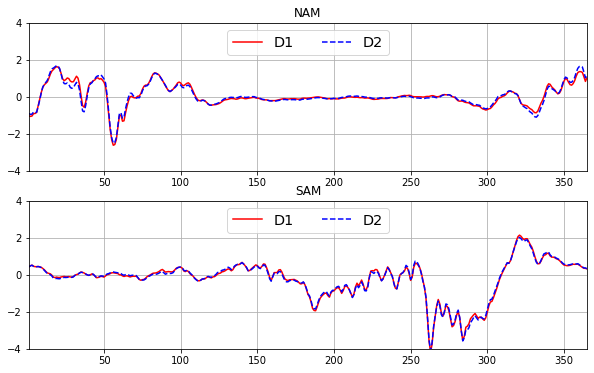

In [4]:
D1 = Reanalysis(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55', \
        annual_cycle_fft=0, running_mean=0, save_index=False)
D2 = Reanalysis(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55', \
        annual_cycle_fft=4, running_mean=0, save_index=False)
for D in [D1, D2]:
    D.load_data()

k = np.isin(D1.level, 10).nonzero()[0]
year = 2007
yi = year - D1.year_start
time1 = np.linspace(1.0, 365, 365)
time2 = np.linspace(1.0, 365, 365)

fig = plt.figure(figsize=(10,6)) # size is optional
ax1 = fig.add_subplot(2,1,1)
ax1.plot(time1, D1.NAM[yi*365:(yi+1)*365, k], 'r', label='D1')
ax1.plot(time2, D2.NAM[yi*365:(yi+1)*365, k], 'b--', label='D2')
legend = ax1.legend(loc='upper center', fontsize="x-large", ncol=2)
ax1.axis([1, 365, -4, 4])
ax1.set_title('NAM')
ax1.grid()

ax1 = fig.add_subplot(2,1,2)
ax1.plot(time1, D1.SAM[yi*365:(yi+1)*365, k], 'r', label='D1')
ax1.plot(time2, D2.SAM[yi*365:(yi+1)*365, k], 'b--', label='D2')
legend = ax1.legend(loc='upper center', fontsize="x-large", ncol=2)
ax1.axis([1, 365, -4, 4])
ax1.set_title('SAM')
ax1.grid()

## Plot the covariance function

Calculating from the original data .......


Text(0.5, 1.0, 'p=10 hPa')

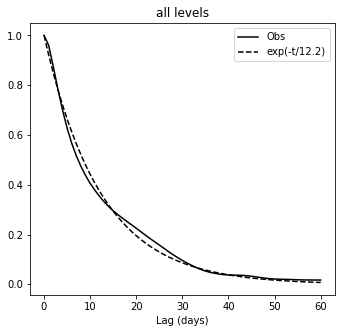

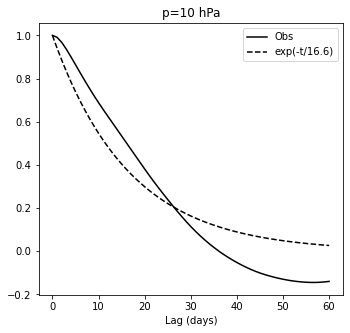

In [6]:
from AM_plot_mod import plot_cov

D1 = Reanalysis(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55', \
        annual_cycle_fft=4, running_mean=0, save_index=False)
D1.load_data()

y = D1.NAM.data  # remove the mask in NAM
plot_cov(y)
plt.gca().set_title('all levels')

k = np.isin(D1.level, 10).nonzero()[0][0]
plot_cov(y[:, k][:, None])
plt.gca().set_title(f"p={D1.level[k]:.0f} hPa")

## Plot lagged regression


Calculating from the original data .......


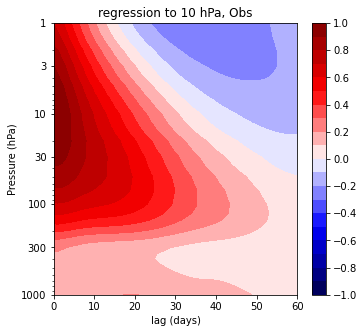

In [7]:
from AM_plot_mod import plot_lag_reg

D1 = Reanalysis(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55', \
        annual_cycle_fft=4, running_mean=0, save_index=False)
D1.load_data()

y = D1.NAM.data
p = D1.level
plot_lag_reg(y, p)


## Make composite for strong and weak vortex events


Calculating from the original data .......


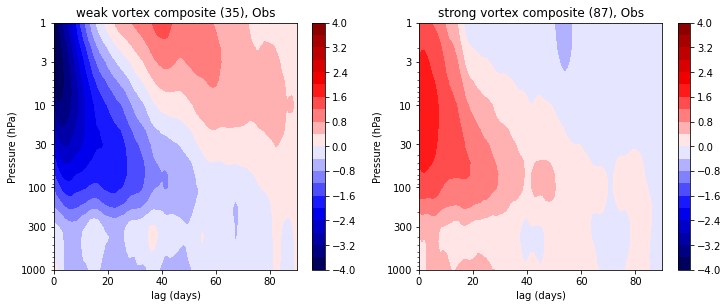

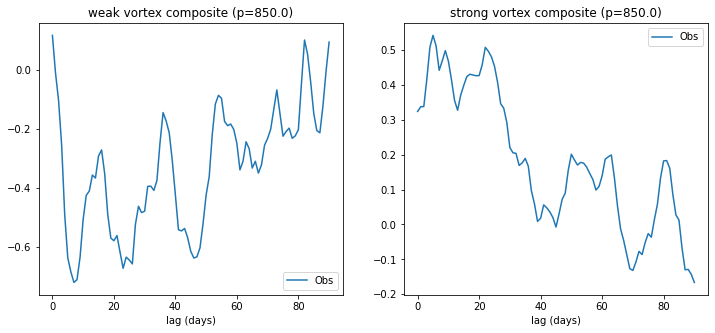

In [8]:
from AM_plot_mod import plot_event

D1 = Reanalysis(name_dir='jra_55', year_start=1958, year_end=2016, name='JRA55', \
        annual_cycle_fft=4, running_mean=0, save_index=False)
D1.load_data()

y = D1.NAM.data
p = D1.level
plot_event(y, p, lag_time=90)